从github下载中文字体
我们将从 gh-proxy 加速下载 思源黑体（简体中文常规体）。

In [2]:
import os
import requests
from pathlib import Path

# 字体文件名和下载地址
FONT_NAME = "SourceHanSansSC-VF.otf"
FONT_URL = "https://cdn.gh-proxy.org/https://raw.githubusercontent.com/adobe-fonts/source-han-sans/release/Variable/OTF/SourceHanSansSC-VF.otf"

# 保存路径：用户家目录下的 .fonts 文件夹（Linux/macOS 常用）
font_dir = Path.home() / ".fonts"
font_dir.mkdir(exist_ok=True)
font_path = font_dir / FONT_NAME

# 如果字体尚未下载，则下载
if not font_path.exists():
    print("📥 正在从gh-proxy加速 下载思源黑体（简体中文）...")
    try:
        resp = requests.get(FONT_URL, timeout=30)
        resp.raise_for_status()
        with open(font_path, "wb") as f:
            f.write(resp.content)
        print(f"✅ 字体已保存至: {font_path}")
    except Exception as e:
        raise RuntimeError(f"❌ 字体下载失败: {e}")
else:
    print(f"✅ 字体已存在: {font_path}")

📥 正在从国内 CDN 下载思源黑体（简体中文）...
✅ 字体已保存至: /home/web_user/.fonts/SourceHanSansSC-VF.otf


将字体注册到 Matplotlib

In [7]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 手动添加字体到 Matplotlib 字体管理器
fm.fontManager.addfont(str(font_path))

# 设置默认字体为「思源黑体」
plt.rcParams['font.sans-serif'] = ['Source Han Sans SC VF']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题

print("✅ 已设置 Matplotlib 默认使用思源黑体显示中文")

✅ 已设置 Matplotlib 默认使用思源黑体显示中文


测试中文绘图

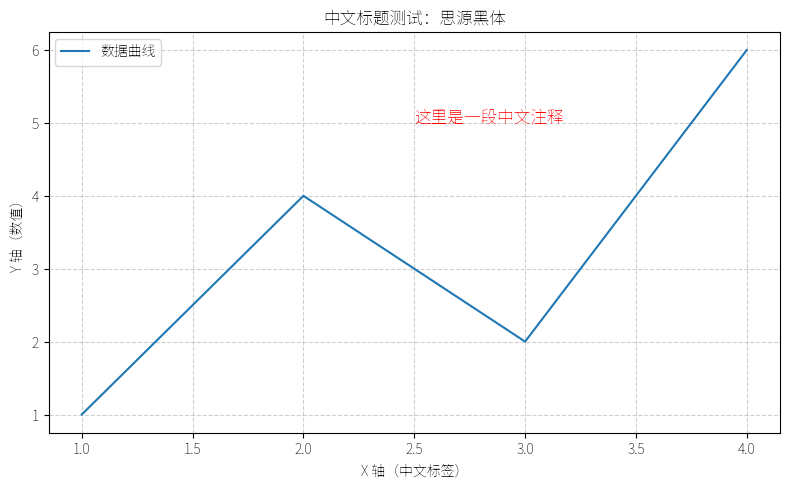

In [9]:
plt.figure(figsize=(8, 5))
plt.plot([1, 2, 3, 4], [1, 4, 2, 6], label='数据曲线')
plt.title('中文标题测试：思源黑体')
plt.xlabel('X 轴（中文标签）')
plt.ylabel('Y 轴（数值）')
plt.legend()
plt.text(2.5, 5, '这里是一段中文注释', fontsize=12, color='red')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()